<div style="border:solid green 2px; padding: 20px">
<b>Привет, Виталий!</b>

Меня зовут Лутченкова Екатерина, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — помочь тебе разобраться в материале, поделиться своим опытом и помочь тебе стать крутым специалистом.

Ниже ты найдешь мои комментарии, они будут в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». **Пожалуйста, не перемещай, не изменяй и не удаляй их**. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки я не смогу принять твой проект. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-LinearRegression" data-toc-modified-id="Модель-LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель LinearRegression</a></span></li><li><span><a href="#Dummy-модель" data-toc-modified-id="Dummy-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dummy модель</a></span></li><li><span><a href="#Модель-LGBMR" data-toc-modified-id="Модель-LGBMR-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель LGBMR</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель CatBoost</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor
import lightgbm as lgb

In [35]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)
df = df.resample('1H').sum()
data = df
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Лаконично. Четко и по делу :)
    
Здесь все верно.
</div>

Вывод: Загрузил данные, выполнил ресемплирование по одному часу 

## Анализ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


In [4]:
df.isna().sum()

num_orders    0
dtype: int64

Text(0.5, 1.0, 'Seasonality day')

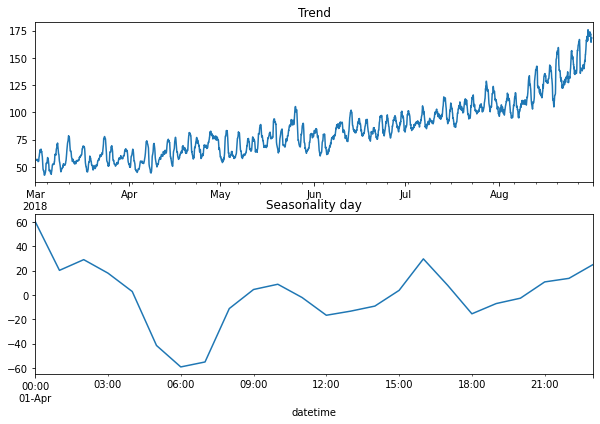

In [5]:
decomposed = seasonal_decompose(df)
plt.figure(figsize=(10, 10))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-04-01 00:00:00':'2018-04-1 23:00:00'].plot(ax=plt.gca())
plt.title('Seasonality day')

In [6]:
# Тест Дики-Фуллера
test = adfuller(df['num_orders'])
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.068924289027945
p-value:  0.028940051402613794
Critical values:  {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
единичных корней нет, ряд стационарен


Вывод: Тренд возростающий, пик заказов такси приходится на 00:00 ночи. Временной ряд стационарный, можно приступать к обучению модели.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Правильно, тренд растет. 
    
Молодец, что смотришь сезонность на более коротком промежутке и делаешь правильные выводы. 
    
За Дики-Фуллера хвалю 👍
</div>

## Обучение

In [7]:
# Функция для дополнительных признаков для лучшего обучения моделей

def make_features(data, max_lag, rolling_mean_size):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df[f'lag_{lag}'] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()

In [8]:
make_features(df, 24, 3)

In [9]:
df.head(10).T

datetime,2018-03-01 00:00:00,2018-03-01 01:00:00,2018-03-01 02:00:00,2018-03-01 03:00:00,2018-03-01 04:00:00,2018-03-01 05:00:00,2018-03-01 06:00:00,2018-03-01 07:00:00,2018-03-01 08:00:00,2018-03-01 09:00:00
num_orders,124.0,85.0,71.0,66.000000,43.0,6.0,12.000000,15.000000,34.0,69.000000
month,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.000000,3.0,3.000000
day,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000
dayofweek,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.000000,3.0,3.000000
hour,0.0,1.0,2.0,3.000000,4.0,5.0,6.000000,7.000000,8.0,9.000000
lag_1,NaN,124.0,85.0,71.000000,66.0,43.0,6.000000,12.000000,15.0,34.000000
lag_2,NaN,NaN,124.0,85.000000,71.0,66.0,43.000000,6.000000,12.0,15.000000
lag_3,NaN,NaN,NaN,124.000000,85.0,71.0,66.000000,43.000000,6.0,12.000000
lag_4,NaN,NaN,NaN,NaN,124.0,85.0,71.000000,66.000000,43.0,6.000000
lag_5,NaN,NaN,NaN,NaN,NaN,124.0,85.000000,71.000000,66.0,43.000000


In [10]:
# Разделим датасет на обучающую и тестовую выборки
train, test = train_test_split(df, test_size=.1, shuffle=False)
train = train.dropna()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>

Здорово, что добавлен параметр `shuffle=False`, чтобы значения не перемешались.
Тут можно еще посмотреть даты, по которым разбился датасет, чтобы убедиться, что все верно.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Зачем ты выделяешь валидационную выборку, если дальше ее никак не используешь?
</div>

In [11]:
# Выделим признаки и целовой признак
X_train = train.drop(['num_orders'], axis=1)
X_test = test.drop(['num_orders'], axis=1)

y_train = train.num_orders
y_test = test.num_orders

In [12]:
# Проведем масштабирование данных
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3950, 29) (442, 29)
(3950,) (442,)


### Модель LinearRegression

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

test_pred = lr_model.predict(X_test)

In [15]:
lr_rmse_test = mean_squared_error(y_test, test_pred, squared=False)

In [16]:
print(f"RMSE тестовой выборки: {lr_rmse_test:.2f}")

RMSE тестовой выборки: 45.81


### Dummy модель

In [17]:
test_pred = np.ones(y_test.shape) * y_train.median()

rmse_test = mean_squared_error(y_test, test_pred, squared=False)

In [18]:
print(f"RMSE тестовой выборки: {rmse_test:.2f}")

RMSE тестовой выборки: 87.15


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Собственная модель - это что такое? Давай напишем пару слов о ней.
</div>

<div class="alert alert-info"> <b>Комментарий студента V2:</b> 

Опечатался. 
    
</div>

### Модель LGBMR

In [19]:
lgb_model = lgb.LGBMRegressor()

params = [{'max_depth': [10],
               'learning_rate': [0.5],
               'n_estimators': [100]}]

gsearch = GridSearchCV(lgb_model, param_grid=params, scoring='neg_mean_squared_error', 
                       cv=TimeSeriesSplit(n_splits=5), verbose=True)
gsearch.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid=[{'learning_rate': [0.5], 'max_depth': [10],
                          'n_estimators': [100]}],
             scoring='neg_mean_squared_error', verbose=True)

In [20]:
prediction = gsearch.predict(X_test)
lgb_rmse_test = mean_squared_error(y_test, prediction, squared=False)
print(f'RMSE тестовой выборки: {lgb_rmse_test:.2f}')

RMSE тестовой выборки: 42.90


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

LGBM лучше использовать так, чтобы не создавать лишние lgb.Dataset: https://habr.com/ru/company/skillfactory/blog/530594/. 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

По какому принципу выбраны параметры? Давай подберем лучшие гиперпараметры для твоих моделей. В нашем случае удобнее использовать кросс-валидацию и поиск гиперпараметров по сетке: Вот [ссылка](https://vc.ru/ml/147132-kak-avtomaticheski-podobrat-parametry-dlya-modeli-mashinnogo-obucheniya-ispolzuem-gridsearchcv). Для катбуста есть свой gridsearch, он работает стабильнее: https://catboost.ai/en/docs/concepts/python-reference_catboost_grid_search.
    
Также не забудь, что в случае с временным рядом нам нужно задать кросс-валидацию TimeSeriesSplit\
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html \
Если мы исследуем временной ряд, то в каждом сплите тестовые индексы должны быть позже по времени, чем обучающие, поэтому перетасовка обычным способом неуместна. Как раз TimeSeriesSplit решает эту проблему.\
Иллюстрация работы:\
</font>
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_013.png)

Сделать это можно примерно так:
```python
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search)
gsearch.fit(X, y)
```
</div>

### Модель CatBoost

In [21]:
cbr_model = CatBoostRegressor()

In [22]:
params = [{'max_depth': [5],
           'learning_rate': [0.07],
           'n_estimators': [250]}]

In [23]:
gsearch = GridSearchCV(cbr_model, param_grid=params, scoring='neg_mean_squared_error', 
                   cv=TimeSeriesSplit(n_splits=5), verbose=True, n_jobs=-1)
gsearch.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 28.8429966	total: 50.1ms	remaining: 12.5s
1:	learn: 27.9695769	total: 52.4ms	remaining: 6.5s
2:	learn: 27.1597052	total: 54.8ms	remaining: 4.51s
3:	learn: 26.4957345	total: 57.2ms	remaining: 3.52s
4:	learn: 25.8433140	total: 59.3ms	remaining: 2.91s
5:	learn: 25.2092314	total: 61.5ms	remaining: 2.5s
6:	learn: 24.5067925	total: 63.7ms	remaining: 2.21s
7:	learn: 23.8983486	total: 65.9ms	remaining: 1.99s
8:	learn: 23.3832510	total: 68.3ms	remaining: 1.83s
9:	learn: 22.9213685	total: 70.4ms	remaining: 1.69s
10:	learn: 22.5216461	total: 72.6ms	remaining: 1.58s
11:	learn: 22.0974256	total: 75ms	remaining: 1.49s
12:	learn: 21.6605474	total: 77.1ms	remaining: 1.41s
13:	learn: 21.2907818	total: 79.4ms	remaining: 1.34s
14:	learn: 21.0018823	total: 82.1ms	remaining: 1.29s
15:	learn: 20.6943473	total: 84.4ms	remaining: 1.23s
16:	learn: 20.3653301	total: 86.6ms	remaining: 1.19s
17:	learn: 20.1373574	total: 88.9ms	remaining: 1.15s
1

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fbd9f0f6460>,
             n_jobs=-1,
             param_grid=[{'learning_rate': [0.07], 'max_depth': [5],
                          'n_estimators': [250]}],
             scoring='neg_mean_squared_error', verbose=True)

In [24]:
prediction = gsearch.predict(X_test)
cbr_rmse_test = mean_squared_error(y_test, prediction, squared=False)
print(f'RMSE тестовой выборки: {cbr_rmse_test:.2f}')

RMSE тестовой выборки: 41.75


<div class="alert alert-info"> <b>Комментарий студента:</b> 

Обучил четыре модели. Подобрал параметры max_lag = 24 и rolling_mean_size = 3 для получения требуем RMSE. 
    
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 

Для катбуста тоже нужно подобрать гиперпараметры. У тебя обычная Линейная регрессия работает сильно лучше продвинутых моделей, это не ок.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>

Хорошо, обучение моделей засчитываю.
</div>

## Вывод

In [25]:
result = pd.DataFrame(np.array([rmse_test, lr_rmse_test, lgb_rmse_test, cbr_rmse_test]),
                      index=['dummies', 'LinearRegression','lgb','CatBoost'])
result.set_axis(['RMSE'],axis='columns',inplace=True)
result

,RMSE
dummies,87.152776
LinearRegression,45.809838
lgb,42.897661
CatBoost,41.748625


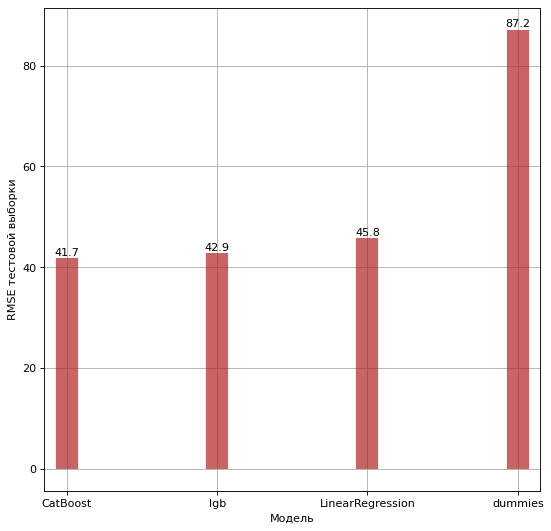

In [26]:
result = result.sort_values(by='RMSE')

fig, ax = plt.subplots(figsize=(8, 8), facecolor='white', dpi= 80)
ax.vlines(x=result.index, ymin=0, ymax=result.RMSE, color='firebrick', alpha=0.7, linewidth=20)

for x, y in enumerate(result.RMSE):
    ax.text(x, y+0.5, round(y, 1), horizontalalignment='center')
plt.xlabel('Модель')    
plt.ylabel('RMSE тестовой выборки')
plt.grid()

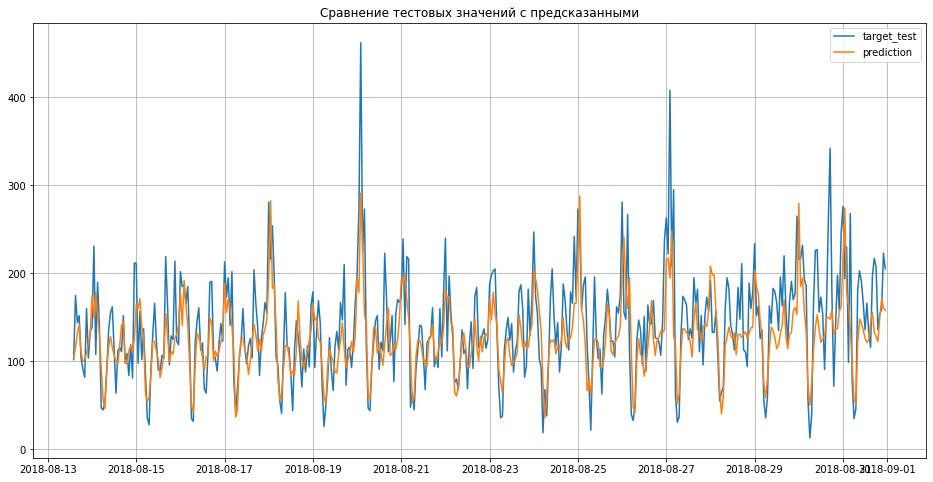

In [128]:
plt.figure(figsize=(16, 8))

plt.plot(y_test, label='target_test')
plt.plot(y_test.index, prediction, label='prediction')

plt.title('Сравнение тестовых значений с предсказанными')
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера (исправлено):</b> 
    
Давай тут еще построим график с реальным и предсказанным значением тестовой выборки. Интересно, как все это дело выглядит. 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2 (исправлено):</b> 

График нужен типо такого: https://www.pvsm.ru/images/2017/04/24/otkrytyi-kurs-mashinnogo-obucheniya-tema-9-analiz-vremennyh-ryadov-s-pomoshyu-Python-61.png
    
На одном графике две линии: реальный временной ряд из тестовой выборки и предсказанный временной ряд из тестовой выборки.

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Вывод:    
    
- Модели LinearRegression, CatBoost, LGBMR на обучающем наборе показали хорошую точность RMSE, но на тестовом наборе только LinearRegression и CatBoost поподают под требования заказчика 46.3 и 47.3 пунктов соответственно, но стоить заметить, что данные модели требуют гораздо большего времени обучения. 

- Тестовая выборка с размером 10% от исходных данных очень мала, рекомендовал бы 20%.
    
- Для более качественного прогноза стоит получить более полные данные, с большим количеством признаков, так как отчеливо виден тренд на сезоность который зависит от месяца и время прилета в аэропортах.
    
- Модель CatBoost полностью соотвествует требованиям заказчика, точность RMSE на обучающем наборе 31,2, на тестовом наборе 47.3. 
    
</div>

<div style="border:solid green 2px; padding: 20px">
    
Спасибо за твою работу, все шаги выполнены.
    
Ты показал хорошее владение методами работы с временными рядами, надеюсь, ты и в будущем будешь их использовать.
    
Мне понравилось, что ты используешь много разных моделей и оцениваешь их качество. Никогда не угадать, какая модель станет лучшей. Молодец, что освоил catboost, это классая библиотека, я часто ее использую.
    
Есть несколько доработок, без выполнения которых я не смогу принять твой проект:
    
    1. Использовать кросс-валидацию;
    
    2. Подобрать гиперапараметры для моделей;
    
    3. Построить график с прогнозом;
    
    
Буду ждать твою работу на повторное ревью. Если у тебя есть какие-то вопросы, буду рада на них ответить 🙂

<div style="border:solid green 2px; padding: 20px"><div style="border:solid green 2px; padding: 20px">
    
Все хорошо, осталось нарисовать график и я приму твою работу. Удачи!

<div style="border:solid green 2px; padding: 20px">

Все комментарии исправлены, поэтому я могу зачесть твою работу. Спасибо за оперативность 👍
    
Если у тебя еще есть какие-то вопросы, ты можешь обратиться к наставнику, мы всегда готовы прийти тебе на помощь. И желаю тебе удачи в освоении следующих тем :)

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48